# Homework 9

## Name: Nils Huber

## CERN physicist for an hour

Phi mesons, $\phi$(1020), are registered by their decays into two kaons.

$$\phi \rightarrow K^- K^+$$

In this task, you fit pseudo-data to find the mass of phi meson and its lifetime.

The decay of short living particles, such as phi mesons, is described by the Breit-Wigner formula:

$$f(m) = A \frac{m \cdot m_\phi \Gamma_\phi(m)}{(m^2 - m^2_\phi)^2 + m^2_\phi \Gamma^2_\phi(m)}$$

where 

$$\Gamma_\phi = \frac{m_\phi}{m} \Gamma_0 \left (\frac{p}{p_0}\right )^3$$

$$p = \sqrt{\left (\frac{m}{2}\right)^2 - m_K^2}$$

$$p_0 = \sqrt{\left (\frac{m_\phi}{2}\right)^2 - m_K^2}$$

where 
$m_K$ = 494 MeV, kaon mass

$m$ - center-of-mass energy that produces $\phi$ meson

$A$ - normalization factor that is equal to the area under the curve,

$m_\phi$ - phi meson mass,

$\Gamma_\phi$ - phi meson decay width, 

$A$, $m_\phi$ and $\Gamma_0$ are model parameters describing the peak.


**(A) Check the given data** (1 P)

You are provided with two arrays cointaining information about center-of-mass energies ``m`` and ``counts`` (which can be proportional to physical quantities like cross-section). Make a quick plot to check the data. Don't forget about axis labels and specifying energy units.


In [108]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [109]:
m = np.asarray([ 990.28571429,  992.57142857,  994.85714286,
        997.14285714,  999.42857143, 1001.71428571, 1004.        ,
       1006.28571429, 1008.57142857, 1010.85714286, 1013.14285714,
       1015.42857143, 1017.71428571, 1020.        , 1022.28571429,
       1024.57142857, 1026.85714286, 1029.14285714, 1031.42857143,
       1033.71428571, 1036.        , 1038.28571429, 1040.57142857,
       1042.85714286, 1045.14285714, 1047.42857143, 1049.71428571,
       1052.        , 1054.28571429, 1056.57142857, 1058.85714286,
       1061.14285714, 1063.42857143, 1065.71428571, 1068.        ,
       1070.28571429, 1072.57142857, 1074.85714286, 1077.14285714,
       1079.42857143, 1081.71428571, 1084.        , 1086.28571429,
       1088.57142857, 1090.85714286, 1093.14285714, 1095.42857143,
       1097.71428571, 1100.        ]) # MeV

counts = np.asarray([2.31003417e-02, 7.66381726e-02, 1.67455262e-01,
       3.11741087e-01, 5.37405428e-01, 8.93031098e-01, 1.46719670e+00,
       2.43247872e+00, 4.15598459e+00, 7.51568994e+00, 1.49749055e+01,
       3.51070312e+01, 1.03632842e+02, 2.16252822e+02, 1.04639025e+02,
       4.59616350e+01, 2.54388979e+01, 1.64404712e+01, 1.17257576e+01,
       8.93503238e+00, 7.13459944e+00, 5.89708248e+00, 5.00438128e+00,
       4.33551917e+00, 3.81884184e+00, 3.40960414e+00, 3.07862337e+00,
       2.80616244e+00, 2.57845502e+00, 2.38564205e+00, 2.22049899e+00,
       2.07762447e+00, 1.95290808e+00, 1.84317215e+00, 1.74592527e+00,
       1.65918918e+00, 1.58137500e+00, 1.51119320e+00, 1.44758725e+00,
       1.38968394e+00, 1.33675579e+00, 1.28819224e+00, 1.24347735e+00,
       1.20217236e+00, 1.16390196e+00, 1.12834334e+00, 1.09521741e+00,
       1.06428173e+00, 1.03532473e+00])  # in units of 1

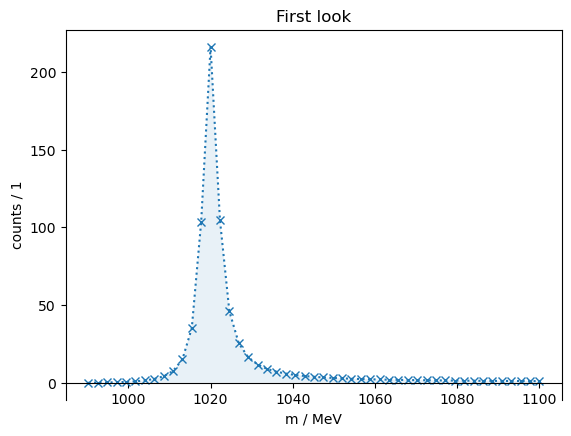

In [110]:
plt.plot(m,counts,'x:')

#Additions to more easly determine A
plt.fill_between(m,0,counts,alpha=0.1)
ax=plt.gca()
ax.spines['bottom'].set_position('zero')

plt.xlabel('m / MeV')
plt.ylabel('counts / 1')
plt.title('First look')
plt.show()

**(B) Function for Breit-Wigner formula** (1 P)

Write a function that takes center-of-mass energy and model parameters (A, $m_\phi$, $\Gamma_0$) and returns the value of $f(E)$ from the formula above. 

As many things in physics, the Breit-Wigner distribution is not a trivial or a simple function and depends on many factors which in turn are some functions of particle masses/energies. 

**Implement the Breit-Wigner formula carefully and double check the correspondance between written formulas and your code!**

In [111]:
mk=494 #MeV

def breit_wigner(mse,A,mph,gamma0):
    p=np.sqrt((mse/2)**2-mk**2)
    p0=np.sqrt((mph/2)**2-mk**2)
    gammaph=mph/mse*gamma0*(p/p0)**3

    nom=mse*mph*gammaph
    denom=(mse**2-mph**2)**2+mph**2*gammaph**2
    formula=A*nom/denom
    return formula

**(C)  Fit the data** (1 P)

Using ```scipy```, fit the data with the Breit-Wigner distribution. Since the parameters of the model differ even in orders of magnitude, it is required to give a starting point for a successfull fit.


Make an _educated guess_ of where approximately the parameters may be if you know that $A$ is an area under the curve, $m_\phi$ is the location of the peak, and $\Gamma_0$ is the width of the peak.

Print the obtained parameters with their units and round to two decimal points.

In [112]:
A_in=1e3    #about 200*5
mph_in=1020 #center
gamma0_in=5 #width from center

popt,pcov=opt.curve_fit(breit_wigner,m,counts,p0=(A_in,mph_in,gamma0_in),absolute_sigma=True)
perr=np.sqrt(np.diag(pcov))

names=['A','mph','gamma0']
for name,param,err in zip(names,popt,perr):
    print('{} = {:.2f} +- {:.2f} MeV'.format(name,param,err))

A = 958.00 +- 5.05 MeV
mph = 1020.00 +- 0.01 MeV
gamma0 = 4.43 +- 0.03 MeV


**(D) Plot the fit** (1 P)


You have obtained the values of Breit-Wigner distribution that describe the given data. Plot the data together with its fit. 

The plot should contain all necessary scientific information to be presented e.g. at the conference.

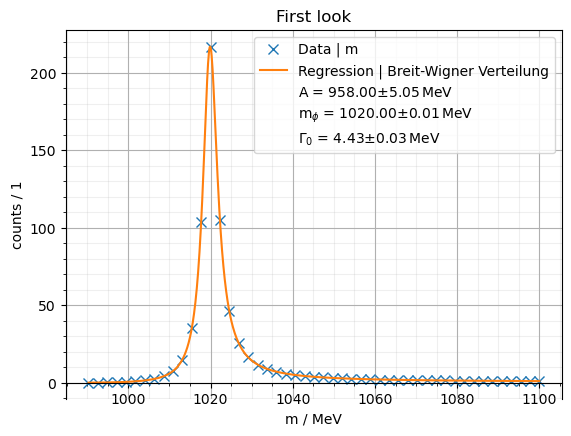

In [113]:
plt.plot(m,counts,'x',label='Data | m',markersize=7)

mlin=np.linspace(min(m),max(m),1000)
fit=plt.plot(mlin,breit_wigner(mlin,*popt),label='Regression | Breit-Wigner Verteilung')

names=['A',r'm$_\phi$',r'$\Gamma_0$']
for name,param,err in zip(names,popt,perr):
    plt.plot(1020,1,'',lw=0,label=r'{} = {:.2f}$\pm${:.2f}$\,$MeV'.format(name,param,err))
#plt.vlines(popt[1],0,breit_wigner(popt[1],*popt),color=fit[0].get_color(),linestyles='--',lw=2,alpha=0.8)

ax=plt.gca()
ax.spines['bottom'].set_position('zero')
plt.grid(which='major',visible=True)
plt.grid(which='minor',visible=True,alpha=0.2)
plt.minorticks_on()

plt.legend()
plt.xlabel('m / MeV')
plt.ylabel('counts / 1')
plt.title('First look')
plt.show()

**(E) Comparing to the previously measured values** (1 P)

Particle Data Group provides the average value of mass of $\phi$ meson as

$$m_\phi = 1019.455 \; \pm 0.020 \; \textrm{MeV}$$

Compare this to the corresponding parameter of your fit:

In [114]:
mph_of = 1019.455   #MeV
mph_err_of = 0.02   #MeV
mph = popt[1]       #MeV
mph_err = perr[1]   #MeV

diff_mph=abs(mph-mph_of)    #Difference between result and offical value
sig_of=diff_mph/mph_err_of  #Amounts of sigmas for overlap
sig=diff_mph/mph_err        #...
sig_min=diff_mph/(mph_err+mph_err_of)   #...


print("The fitted value difers by {:.0f} sigma from the offical value.".format(sig))
print("The offical value differs by {:.0f} sigma from the offial value.".format(sig_of))
if min([sig_of,sig,sig_min])>3:
    print("-> The values don't fit together!")
else:
    print("-> The values fit together!")

The fitted value differs by 38 sigma from the offial value.
The offical value differs by 27 sigma from the offial value.
-> The values don't fit together!


The lifetime of a particle is another important characteristics alongside its mass. The lifetime is connected to the particle decay width (same as one of the model parameters) as

$$\Gamma = \hbar/\tau$$

where $\hbar = \frac{h}{2\pi}$ is Dirac constant.

Calculate lifetime of $\phi$ meson and compare it to the mean value of previous measuments which is $1.55 \pm 0.01 \times 10^{-22}$ s.

_Don't forget that your decay width has units of MeV!_

In [121]:
from scipy import constants as cst
hbar=cst.hbar
eV=cst.e
gamma=popt[2]*1e6*eV    #Transform to Joule
#gamma_err=perr[2]*1e6*eV 


lt=hbar/gamma   #s
#lt_err=hbar/gamma**2*gamma_err

lt_of=1.55e-22
lt_err=0.01e-22

diff_lt=abs(lt_of-lt)
sig_lt=diff_lt/lt_err


print("The offical value differs by {:.0f} sigma from the offical value.".format(sig_lt))
if sig_lt>3:
    print("-> The values don't fit together!")
else:
    print("-> The values fit together!")

The offical value differs by 6 sigma from the offial value.
-> The values don't fit together!
